## Self-Supervised Autoencoding MNIST

In [1]:
import torch
import argparse
import MNIST_121 
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=8,
    latent_dim=128,
    device=device
)

# Architecture Reasoning

---

## 1. Encoder Design

### Layer-by-Layer Breakdown:

1. **First Convolution (1 → 8 channels)**  
   - What it does: Detects basic shapes in grayscale images  
   - Filter size: 3×3  
   - Stride: 2 to reduce spatial resolution  
   - Why: Lightweight and effective for MNIST (28×28)  

2. **Second Convolution (8 → 16 channels)**  
   - Learns more complex digit patterns  
   - Also uses 3×3 filters and stride 2  
   - Why: Doubles feature depth while reducing size again  

3. **Flatten + Linear (16×7×7 → 128)**  
   - Compresses features to a 128-dimensional latent vector  
   - Why: 128 is a good tradeoff between compactness and expressiveness  

---

## 2. Decoder Design

### How We Reconstruct:

1. **Linear (128 → 16×7×7)**  
   - Expands the latent space back into a 3D tensor  
   - Why: Rebuilds spatial structure from latent code  

2. **ConvTranspose2d (16 → 8 channels)**  
   - Upsamples the feature maps  
   - Why: Gradually brings back the original image size  

3. **ConvTranspose2d (8 → 1 channel)**  
   - Final grayscale image output  
   - Activation: Sigmoid to keep pixel values between 0–1  
   - Why: Matches MNIST format (1×28×28)  

---

## 3. Classifier Design

### Simple Classifier Structure:

- Takes 128-number latent vector as input  
- Fully connected layers: `128 → 64 → 10`  
- Activation: ReLU and Dropout (0.2)  
- Why: Enough capacity to classify digits without overfitting  

---

## 4. Training Choices

| Setting        | Our Choice | Why It Works                        |
|----------------|------------|-------------------------------------|
| Learning Rate  | 0.001      | Stable for Adam                     |
| Batch Size     | 128        | Balanced for MNIST and GPU usage    |
| Epochs         | 10         | Converges well on small datasets    |
| Optimizer      | Adam       | Fast and adaptive updates           |
| Dropout        | 0.2        | Helps prevent overfitting           |
| Loss Functions | MSE (AE), CE (Classifier) | Fits task objectives       |

---

## 5. Why This Works Well

1. **Simplicity with Purpose**  
   - The architecture is small but deep enough for MNIST  
   - Avoids overfitting while still learning useful representations  

2. **Effective Compression**  
   - Latent vector captures essential digit characteristics  
   - Decoder reconstructs well with just two layers  

3. **Good Transfer to Classification**  
   - Freezing encoder and training classifier gives strong results  
   - Reflects how well the encoder generalizes digit features  

In [2]:
train_loader, val_loader, test_loader = MNIST_121.load_data(args)
autoencoder = MNIST_121.Autoencoder(args.latent_dim).to(args.device)
classifier = MNIST_121.Classifier(args.latent_dim).to(args.device)

## Training Autoencoder

Epoch [1/1], Train Loss: 0.0127, Val Loss: 0.0050


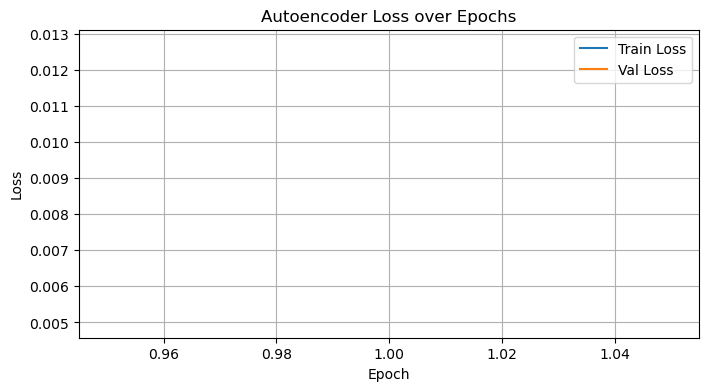

In [ ]:
MNIST_121.train_autoencoder(autoencoder, train_loader, val_loader,test_loader, args, epochs=1)

## Training Classifier

Epoch [1/1], Train Acc: 91.48%, Val Acc: 95.72%, Test Acc: 96.17%


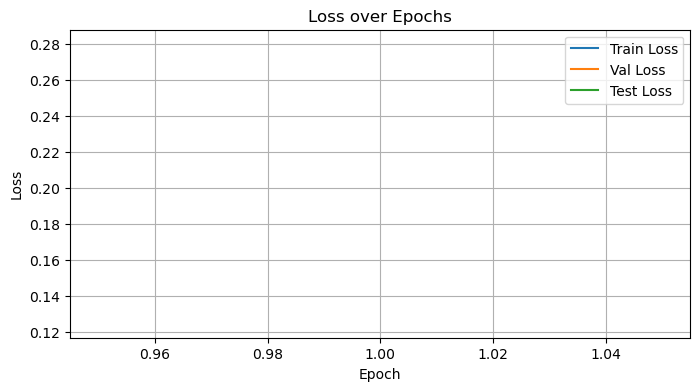

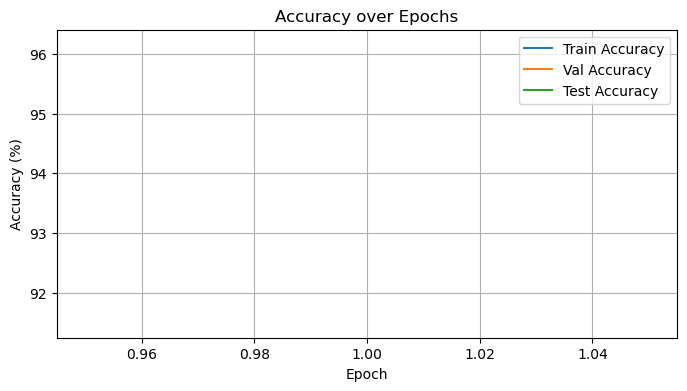

In [4]:
MNIST_121.train_classifier(autoencoder, classifier, train_loader, val_loader,test_loader, args, epochs=1)

## CIFAR-10 Reconstructions

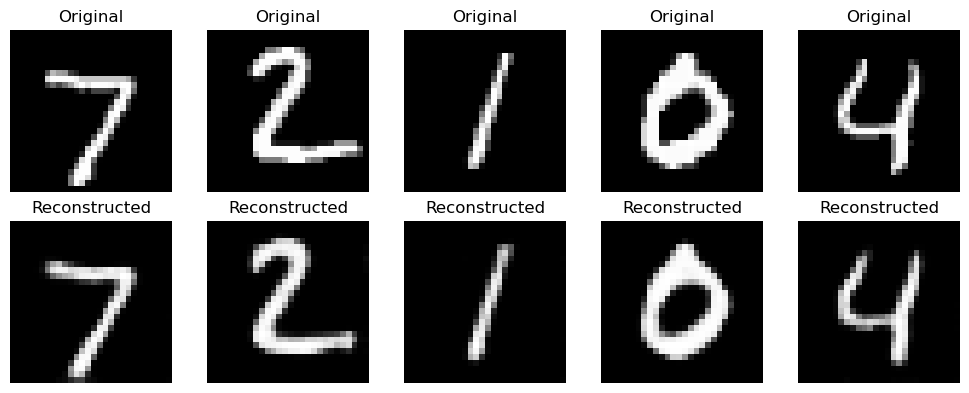

In [5]:
MNIST_121.visualize_reconstructions(autoencoder, test_loader, args.device)

## t-SNE Analysis of Latent Spaces

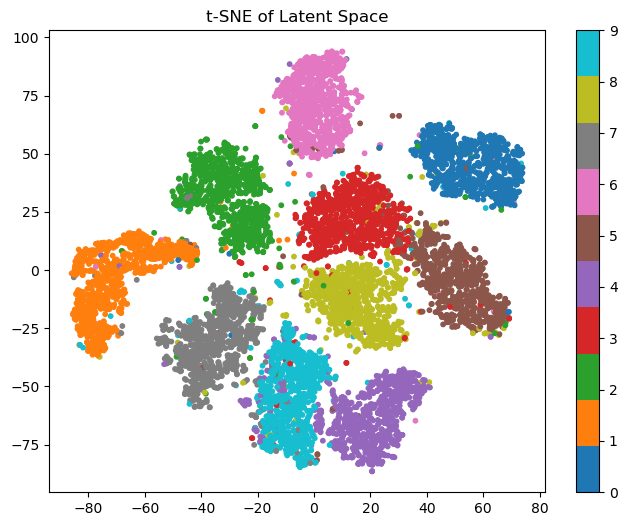

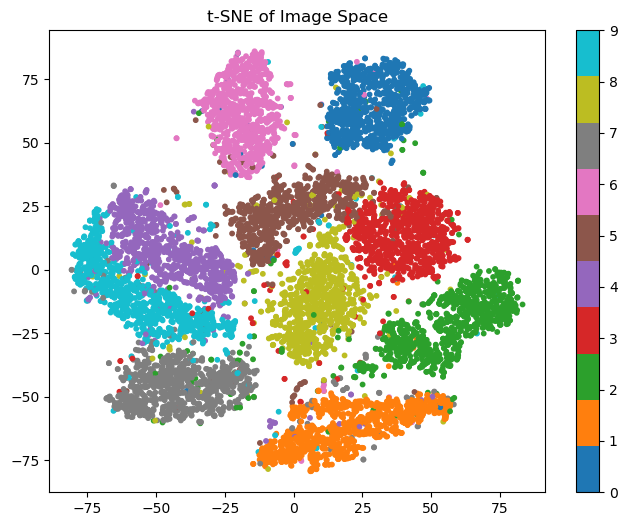

In [6]:
MNIST_121.plot_tsne(autoencoder, test_loader, args.device)